**Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**Data collection and processing**

In [ ]:
# Load the dataset to pandas dataframe
data = pd.read_csv("/content/Rainfall.csv")

In [ ]:
print(data.head())

   day  pressure   maxtemp  temparature  ...  rainfall  sunshine           winddirection  windspeed
0    1     1025.9     19.9         18.3  ...       yes       9.3                    80.0       26.3
1    2     1022.0     21.7         18.9  ...       yes       0.6                    50.0       15.3
2    3     1019.7     20.3         19.3  ...       yes       0.0                    40.0       14.2
3    4     1018.9     22.3         20.6  ...       yes       1.0                    50.0       16.9
4    5     1015.9     21.3         20.7  ...       yes       0.0                    40.0       13.7

[5 rows x 12 columns]


In [ ]:
data.shape

(366, 12)

In [ ]:
print(data.tail())

     day  pressure   maxtemp  temparature  ...  rainfall  sunshine           winddirection  windspeed
361   27     1022.7     18.8         17.7  ...       yes       0.0                    30.0       18.4
362   28     1026.6     18.6         17.3  ...       yes       1.0                    20.0       25.9
363   29     1025.9     18.9         17.7  ...       yes       4.6                    70.0       33.4
364   30     1025.3     19.2         17.3  ...       yes       1.2                    20.0       20.9
365   31     1026.4     20.5         17.8  ...        no       5.7                    20.0       23.3

[5 rows x 12 columns]


In [ ]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
print("Data info: ", data.info)

Data info:  <bound method DataFrame.info of      day  pressure   maxtemp  temparature  ...  rainfall  sunshine           winddirection  windspeed
0      1     1025.9     19.9         18.3  ...       yes       9.3                    80.0       26.3
1      2     1022.0     21.7         18.9  ...       yes       0.6                    50.0       15.3
2      3     1019.7     20.3         19.3  ...       yes       0.0                    40.0       14.2
3      4     1018.9     22.3         20.6  ...       yes       1.0                    50.0       16.9
4      5     1015.9     21.3         20.7  ...       yes       0.0                    40.0       13.7
..   ...        ...      ...          ...  ...       ...       ...                     ...        ...
361   27     1022.7     18.8         17.7  ...       yes       0.0                    30.0       18.4
362   28     1026.6     18.6         17.3  ...       yes       1.0                    20.0       25.9
363   29     1025.9     18.9         1

In [ ]:
# Remove extra spaces in all columns
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data = data.drop(columns=['day'])

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
# Checking the number of missing values
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [ ]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
# Handle the missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [ ]:
# Checking the number of missing values
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [ ]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Converting yes and no to 1 and 0 respectively
data["rainfall"] = data["rainfall"].map({"yes": 1, "no": 0})

In [ ]:
data["rainfall"].unique()

array([1, 0])

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


**Exploratory Data Analysis (EDA)**

In [ ]:
data.shape

(366, 11)

In [ ]:
# Setting the plot style for all the plots
sns.set(style="whitegrid")

In [ ]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [ ]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

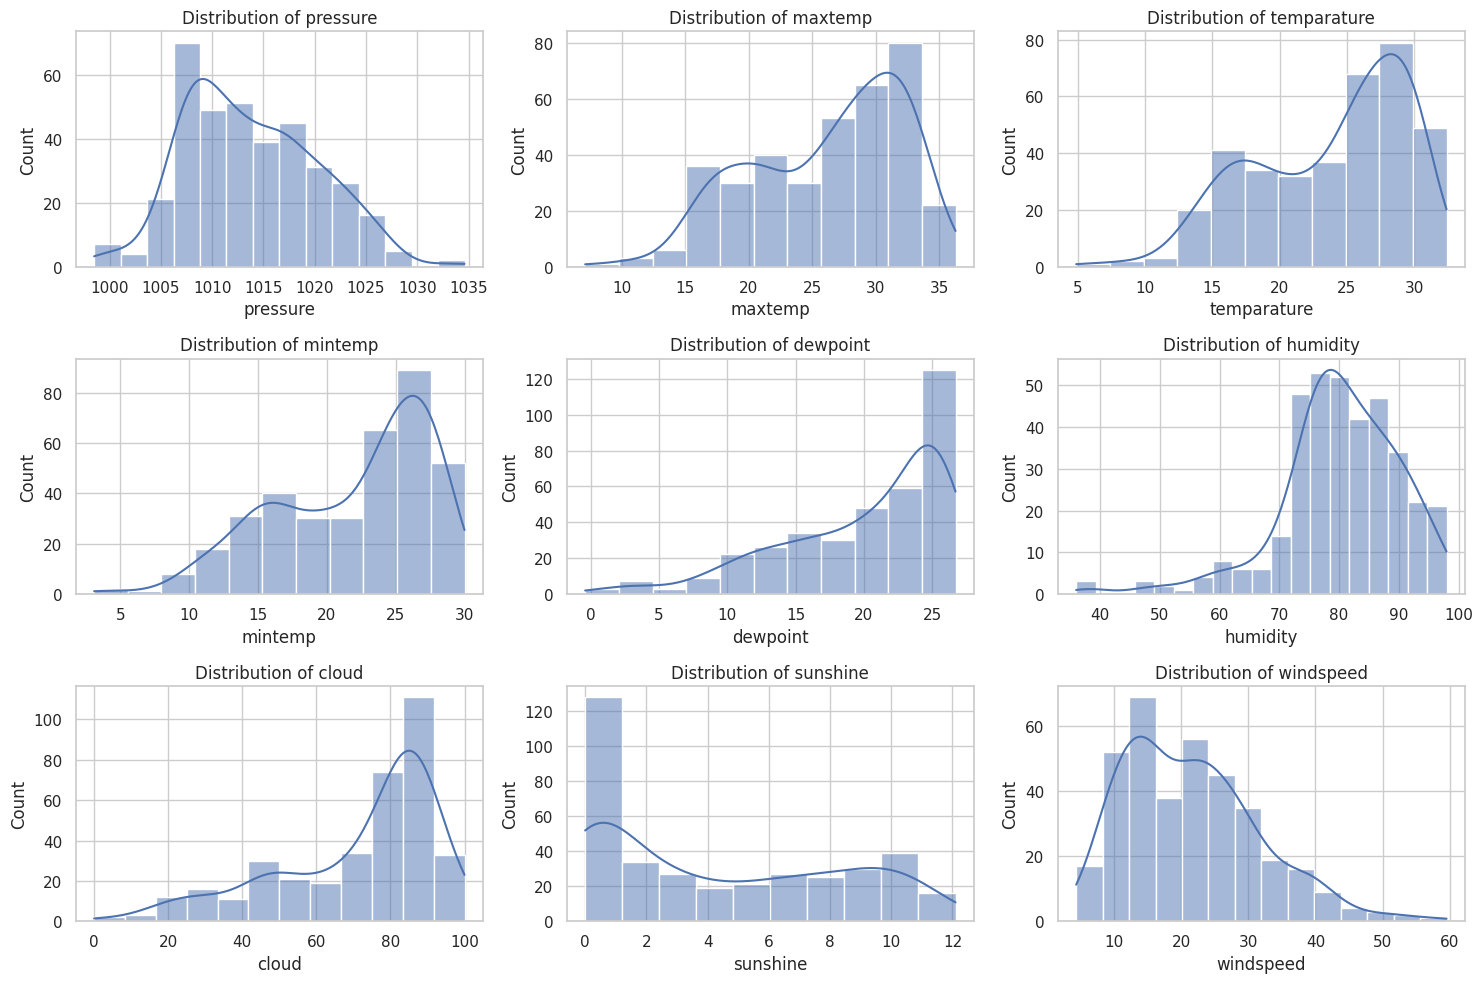

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

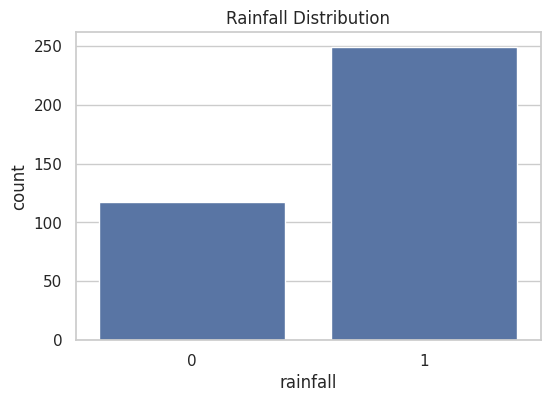

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x = "rainfall", data = data)
plt.title("Rainfall Distribution")
plt.show()

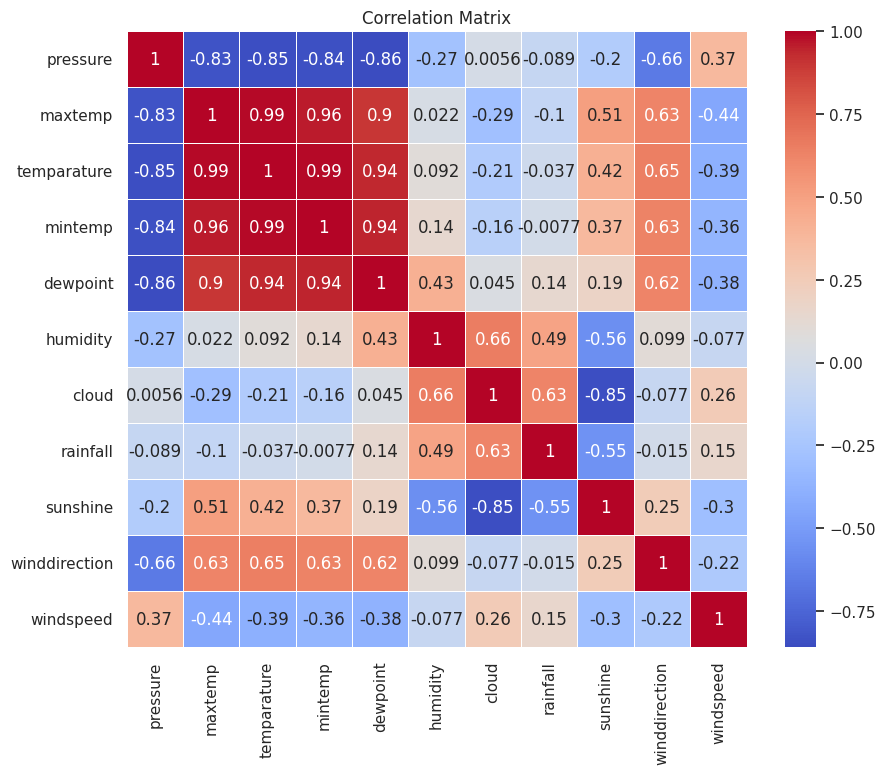

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

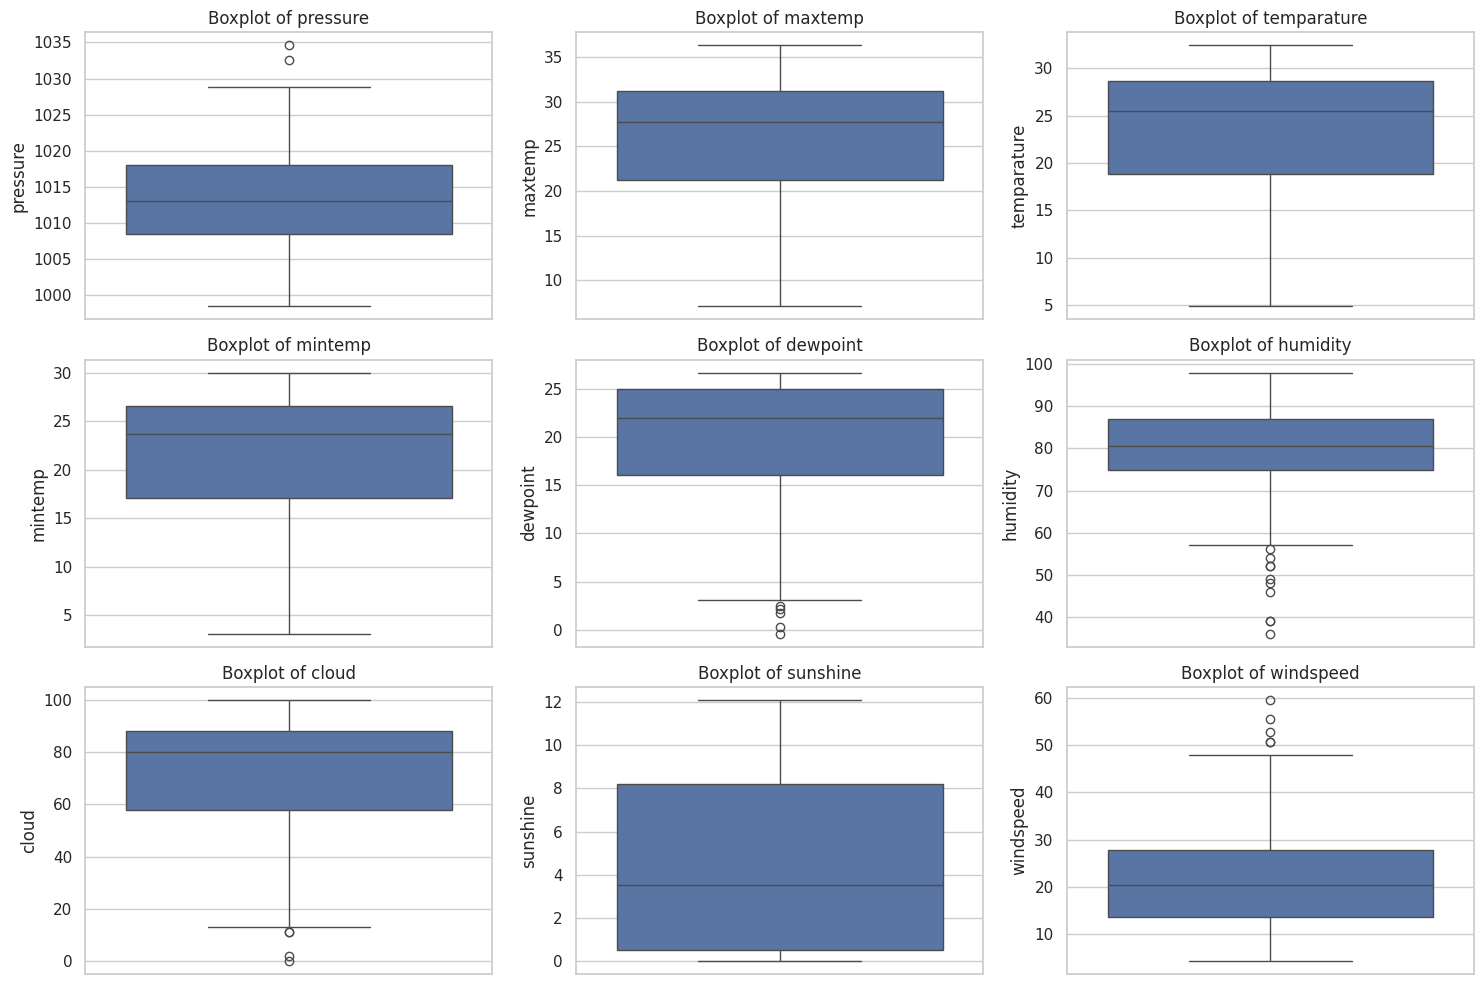

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

**Data preprocessing**

In [ ]:
# Drop highly correlated columns
data = data.drop(columns=['maxtemp', 'mintemp', 'temparature'])

In [ ]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
data["rainfall"].value_counts()

,count
rainfall,
1,249
0,117


In [ ]:
# Seperate majority and minority class
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]

In [ ]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [ ]:
# Downsample the data to match the minority count
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [ ]:
df_majority_downsampled.shape

(117, 8)

In [ ]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [ ]:
# Shuffling the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
# Split features and target as X and y
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [ ]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model training**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ["sqrt", "log2"],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Hypertuning using GridsearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_rf_model = grid_search.best_estimator_
print("Best parameters for Random forest: ", grid_search.best_params_)

Best parameters for Random forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


**Model evaluation**

In [ ]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross-validation score: 0.818918918918919


In [ ]:
# Test set performance
y_pred = best_rf_model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Confusion matrix on test set:\n", confusion_matrix(y_test, y_pred))
print("Classification report on test set:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.7446808510638298
Confusion matrix on test set:
 [[17  7]
 [ 5 18]]
Classification report on test set:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



**Prediction on unknown data**

In [ ]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])
prediction = best_rf_model.predict(input_df)
print("Prediction result: ", "Rainfall" if prediction[0] == 1 else "No rainfall")

Prediction result:  Rainfall


In [ ]:
# Save model and feature names to a pickle file
model_data = {'model': best_rf_model, 'feature_names': X.columns.tolist()}
with open('rainfall_prediction_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

**Load the saved model and file and use it for prediction**

In [ ]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
# Load the trained model and featured names from the pickle file
with open('rainfall_prediction_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

In [ ]:
model = model_data['model']
feature_names = model_data['feature_names']

In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns = feature_names)
prediction = best_rf_model.predict(input_df)
print("Prediction result: ", "Rainfall" if prediction[0] == 1 else "No rainfall")

Prediction result:  Rainfall
